<a href="https://colab.research.google.com/github/vaibhavgp69/nlp-basics/blob/main/senti_scrap_summi_auto_ipnyb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install transformers numpy pandas beautifulsoup4 requests
!pip install sentencepiece
!pip install rouge
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt

In [39]:
class sentiment_analysis:
    
    def __init__(self,text):
        self.text=text       
    def score(self):
        global sc
        tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
        model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
        tokens = tokenizer.encode(self.text, return_tensors='pt')
        result = model(tokens)
        sentiment=['Very Opposing','Slightly Negative','Needs improvement','Slightly positive','Complete Grant']
        sc=sentiment[int(torch.argmax(result.logits))]
        return int(torch.argmax(result.logits))

In [40]:

comments = [
    "I do not approve with this bill , it is very harmfull and effective"
    "This amendment is a significant milestone in protecting the rights and well-being of young girls.",
    "Raising the minimum age of marriage is a crucial step towards eradicating the harmful practice of child marriage.",
    "While it's important to address child marriage, we must also focus on tackling the underlying socio-economic factors that perpetuate it.",
    "This amendment reflects a positive societal shift towards prioritizing the education and development of young girls.",
    "The government should complement this amendment with comprehensive sex education programs to effectively combat child marriages.",
    "Raising the age limit for marriage can help prevent coerced marriages and empower girls to make informed choices about their lives.",
    "It's essential to strike a balance between respecting cultural traditions and ensuring the rights and autonomy of young girls.",
    "Addressing child marriage requires a holistic approach involving education, awareness, and strict legal measures.",
    "Raising the age of marriage should be accompanied by initiatives to promote gender equality and empower girls through education and skill development.",
    "While this amendment is commendable, it must be accompanied by effective implementation and enforcement across all communities.",
    "Combating child marriage necessitates collaboration among the government, civil society organizations, and local communities.",
    "Raising the age of marriage should be coupled with efforts to eliminate dowry practices and other harmful customs associated with early marriages.",
    "Legislative reforms that protect the rights of vulnerable sections, such as young girls, are a positive sign of progress.",
    "Child marriage perpetuates a cycle of poverty and curtails opportunities for girls. This amendment is a significant step towards breaking that cycle.",
    "Sustained awareness campaigns and community engagement are crucial to change mindsets and create a society that rejects child marriages.",
    "This amendment should be viewed as part of a broader initiative to address gender inequality and promote women's empowerment.",
    "Support and rehabilitation programs must be provided to girls who have already been affected by child marriages, in addition to raising the age of marriage.",
    "Community leaders and religious institutions should actively promote education and discourage early marriages to protect young girls.",
    "Creating an environment where young girls can exercise their agency and contribute meaningfully to society is paramount.",
    "This amendment symbolizes the progress being made in safeguarding the rights of girls and protecting them from the consequences of child marriages."]
rating=[]
for i in comments:
  s=sentiment_analysis(i)
  rating.append(s.score())



In [ ]:
import seaborn as sns
sns.histplot(data=rating)

COMMENT ANALYSIS MODEL ABOVE
^
|
|
-------------------------
Web scarping summary key points below

In [36]:
import requests
from bs4 import BeautifulSoup
url='https://prsindia.org/billtrack/the-taxation-laws-amendment-bill-2016'
html=requests.get(url)
s=BeautifulSoup(html.content,'html.parser')
# print(s.prettify())
key=s.find_all('a',title='PRS Bill Summary')
for i in key:
  k=i.get('href')
key
url2=('https://prsindia.org'+k)
url2
html2=requests.get(url2)
s1=BeautifulSoup(html2.content,'html.parser')
key1=s1.find(class_='body_content')


In [ ]:
#TO GET HEADING AND SUMMARY OF BILL
import unicodedata
key_points=[]
heading=[]
ministry=[]
status=[]
pdf_link=[]
k=key1.find_all('ul')
k
if not k:
  k=s.find_all('ul')
  
  for i in range(3,len(k)-5):
     key_points.append(unicodedata.normalize("NFKD",k[i].get_text(strip='True')))
  #  print(k[i].get_text(strip='True')+'\n')
elif len(k)==1:
  k=key1.find_all('span',style='font-size:16px')
  if not k:
    k=key1.find_all('span',style='font-family:Times New Roman,Times,serif')
    for i in k:
      key_points.append(unicodedata.normalize("NFKD",i.get_text(strip='True')))
  else:
    for i in k:
      key_points.append(unicodedata.normalize("NFKD",i.get_text(strip='True')))
else:
   k=key1.find_all('span',style='font-family:Times New Roman,Times,serif')
   if  k:
    for i in k:
      key_points.append(unicodedata.normalize("NFKD",i.get_text(strip='True')))
   else:
    k=key1.find_all('span',style='font-family:"Times New Roman",serif')
    for i in k:
      key_points.append(unicodedata.normalize("NFKD",i.get_text(strip='True')))
head=s.find_all('a',class_='active fs-28')
for i in head:
  heading.append(unicodedata.normalize("NFKD",i.get_text(strip='True')))
mini=s.find('div',class_='field field-name-field-ministry field-type-taxonomy-term-reference field-label-inline clearfix')
# print(s.prettify())
if mini:
  for i in mini:
    ministry.append(unicodedata.normalize("NFKD",i.get_text(strip='True')))
  ministry=ministry[3]  
else:
  ministry.append('None')
  ministry=ministry[0]
stat=s.find_all('div',class_='field field-name-field-own-status field-type-list-text field-label-hidden')
if stat:
  for i in stat:
    status.append(unicodedata.normalize("NFKD",i.get_text(strip='True')))
else:
  status.append('Unkown')
data=[heading[0],ministry,status[len(status)-1],key_points[:len(key_points)-1]]
# print(key1.prettify())
data


In [ ]:
print('\n HEADING : \n\n'+heading[0][-4:])
print('\n KEY POINTS : \n')
for i in range(len(key_points)-1):
  print(key_points[i]+'\n')
print('\n MINISTRY : \n\n'+ministry+'\n\n')
print(' STATUS : \n')
if status[len(status)-1]=='Passed':
  print('Passed')
else:
  print('Pending')

**COMPILED CLASS BELOW FOR SCRAPING**

In [10]:
#do this to use this file - from bs import bill_info
#create a object of the class bill_info(url) where url is a string of the https link to website
#data = object.scrape() for storing all bills data in variable data 
#sends a array with [ heading , ministry  , status , key points]
#object.show()to print and see them individually 



import requests
from bs4 import BeautifulSoup
import unicodedata
class bill_info:
  def __init__(self,url):
    self.url = url
  def scrape(self):
    global key_points
    global heading
    global ministry
    global status
    global data
    key_points=[]
    heading=[]
    ministry=[]
    status=[]
    data=[]
    html=requests.get(self.url)
    s=BeautifulSoup(html.content,'html.parser')
    key=s.find_all('a',title='PRS Bill Summary')
    for i in key:
      k=i.get('href')
    url2=('https://prsindia.org'+k)
    url2
    html2=requests.get(url2)
    s1=BeautifulSoup(html2.content,'html.parser')
    key1=s1.find(class_='body_content')
    k=key1.find_all('ul')
    if not k:
     k=s.find_all('ul')
     for i in range(3,len(k)-5):
        key_points.append(unicodedata.normalize("NFKD",k[i].get_text(strip='True')))
    elif len(k)==1:
      k=key1.find_all('span',style='font-size:16px')
      if not k:
        k=key1.find_all('span',style='font-family:Times New Roman,Times,serif')
        for i in k:
          key_points.append(unicodedata.normalize("NFKD",i.get_text(strip='True')))
      else:
        for i in k:
          key_points.append(unicodedata.normalize("NFKD",i.get_text(strip='True')))
    else:
      k=key1.find_all('span',style='font-family:Times New Roman,Times,serif')
      if  k:
       for i in k:
         key_points.append(unicodedata.normalize("NFKD",i.get_text(strip='True')))
      else:
       k=key1.find_all('span',style='font-family:"Times New Roman",serif')
       for i in k:
         key_points.append(unicodedata.normalize("NFKD",i.get_text(strip='True')))
    head=s.find_all('a',class_='active fs-28')
    for i in head:
      heading.append(unicodedata.normalize("NFKD",i.get_text(strip='True')))
    mini=s.find('div',class_='field field-name-field-ministry field-type-taxonomy-term-reference field-label-inline clearfix')
    if mini:
        for i in mini:
         ministry.append(unicodedata.normalize("NFKD",i.get_text(strip='True')))
        ministry=ministry[3]  
    else:
         ministry.append('None')
         ministry=ministry[0]
    stat=s.find_all('div',class_='field field-name-field-own-status field-type-list-text field-label-hidden')
    if stat:
        for i in stat:
          status.append(unicodedata.normalize("NFKD",i.get_text(strip='True')))
    else:
        status.append('Unkown')
    data=[heading[0],ministry,status[len(status)-1],key_points[:len(key_points)-1]]
    return data


  def show(self):
    print('\n HEADING : \n\n'+heading[0])
    
    print('\n MINISTRY : \n\n'+ministry+'\n\n')
    print(' STATUS : \n')
    if status[len(status)-1]=='Passed':
      print('Passed')
    else:
     print('Pending')
    print('\n KEY POINTS : \n')
    for i in range(len(key_points)-1):
      print(key_points[i]+'\n')

In [42]:
url='https://prsindia.org/billtrack/the-indian-medicine-central-council-amendment-bill-2020'
bill=bill_info(url)
data=bill.scrape()
bill.show()



 HEADING : 

The Indian Medicine Central Council (Amendment) Bill, 2020

 MINISTRY : 

Health


 STATUS : 

Passed

 KEY POINTS : 

The Indian Medicine Central Council (Amendment) Bill, 2020 was introduced in Rajya Sabha on September 14, 2020.  The Bill amends the Indian Medicine Central Council Act, 1970.   The Act provides for the constitution of a Central Council which regulates the education and practice of the Indian Medicine system (includes Ayurveda, Yoga, Naturopathy).  The Bill replaces the Indian Medicine Central Council (Amendment) Ordinance, 2020 which was promulgated on April 24, 2020.

Supersession of the Central Council:The Bill provides that the Central Council will stand superseded from April 24, 2020 (date of promulgation of the Ordinance).   The Central Council will be reconstituted within one year from the date of its supersession.  In the interim period, the central government will constitute a Board of Governors, which will exercise the powers of the Central Coun

In [ ]:
#TO SCRAPE ALL BILLS WHICH ARE PENDING IN THE MAIN HOME PAGE WITH JUST 1 URL
import requests
from bs4 import BeautifulSoup
url='https://prsindia.org/billtrack/category/all'
html=requests.get(url)
s=BeautifulSoup(html.content,'html.parser')
mega_data=[]
n=0
key=s.find_all('div' ,class_="views-row")
for i in key:
  if(n<19):
    key2=i.find('a')
    link='https://prsindia.org'+ key2.get('href')
    key3=i.find('span' ,class_="status-pending")
    stat=key3.get_text(strip='True')
    if(stat=='Pending'):
      bill=bill_info(link)
      mega_data.append(bill.scrape())
      n+=1

**BELOW FOR SUMMARIZER MODEL**

In [20]:

from transformers import AutoModelWithLMHead, AutoTokenizer
from transformers import pipeline
from rouge import Rouge

In [17]:
#CLASS TO SUMMARIZE ACCORDING TO  USERS CHOICE
class summarize:
    def __init__(self,text,sum_index):
        self.text=text
        self.sum_index=sum_index       
    def get(self):
        num=len(self.text.split())
        mid=round(num*self.sum_index)
        low=round(mid-0.1*mid)
        high=round(mid+0.1*mid)
        summarizer = pipeline("summarization")
        return summarizer(self.text, max_length=high, min_length=low, do_sample=False)[0]['summary_text']


In [ ]:
sum_percent=60
ref=' '.join(data[3])
s=summarize(ref,sum_percent)
model_distilbert=s.get()
print(model_distilbert
      
      
      
      
      )

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Your max_length is set to 14322, but your input_length is only 290. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=145)


In [23]:
rg=Rouge()
model
r=rg.get_scores(model_distilbert,ref)
import pandas as pd
df=pd.json_normalize(r)
print(df)



   rouge-1.r  rouge-1.p  rouge-1.f  rouge-2.r  rouge-2.p  rouge-2.f  \
0   0.447619   0.979167   0.614379   0.346154   0.931034   0.504673   

   rouge-l.r  rouge-l.p  rouge-l.f  
0   0.447619   0.979167   0.614379  


<Axes: title={'center': 'Multiple Rouge Scores'}, xlabel='rouge-1.r'>

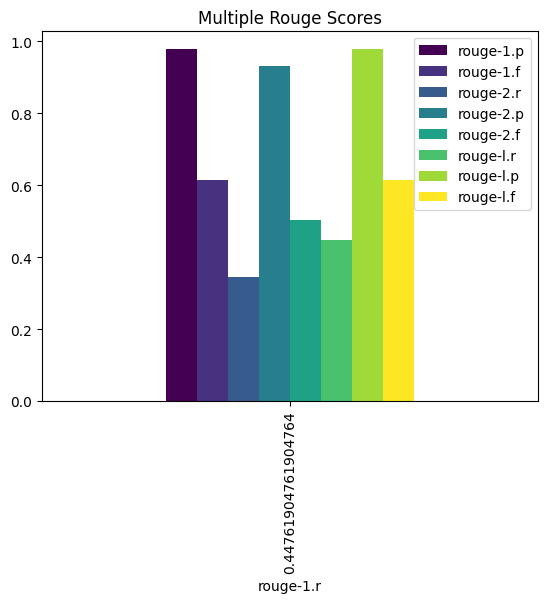

In [24]:
df.plot(kind='bar', x=0, title = 'Multiple Rouge Scores', colormap = 'viridis')
#HIGH PRECISION ROUGE SCORE - Prediction based positive outcomes